In [1]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
10 * math.log10(9.35630516E+3)

39.71104378073287

In [8]:
# 최대 및 최소값과 그때의 고각 및 방위각 구하기

file_path = "C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz.ffe"
max = -float('inf')
min = float('inf')
max_angles = (None, None)
min_angles = (None, None)

def convert_to_dbsm(rcs_m2):
    """m^2울 dBsm으로 변환"""
    return 10 * math.log10(rcs_m2)

with open(file_path, 'r') as file:
    lines = file.readlines()

# RCS 값에 맞는 부분을 찾음
data_start_index = None
for i, line in enumerate(lines):
    if 'RCS(Total)' in line:
        data_start_index = i + 1
        break

# RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
rcs_data = {}
for line in lines[data_start_index:]:
    if line.strip() == '':
        break
    parts = line.split()
    try:
        elevation = int(float(parts[0]))  # U 고각
        azimuth = int(float(parts[1]))  # V 방위각
        rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
        rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm

        # 최대 및 최소 값 업데이트
        if rcs_value_dbsm > max:
            max = rcs_value_dbsm
            max_angles = (elevation, azimuth)
        if rcs_value_dbsm < min:
            min = rcs_value_dbsm
            min_angles = (elevation, azimuth)

    except ValueError:
        continue

print(f"Maximum RCS (dBsm): {max} at Elevation: {max_angles[0]}, Azimuth: {max_angles[1]}")
print(f"Minimum RCS (dBsm): {min} at Elevation: {min_angles[0]}, Azimuth: {min_angles[1]}")

Maximum RCS (dBsm): 58.536795823330635 at Elevation: 180, Azimuth: 177
Minimum RCS (dBsm): -25.885378839899037 at Elevation: 85, Azimuth: 29


In [2]:
# ffe 파일에서 필요한 고각, 방위각, RCS값을 추출한 후 csv파일로 생성
# 0도부터 360도까지의 데이터가 있는 경우
# 경로는 필요에 맞게 알맞게 수정

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz_FFE.csv'

def process_and_save_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = int(float(parts[0]))  # U 고각
            azimuth = int(float(parts[1]))  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in range(181):  # Elevation angles from 0 to 180 degrees
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

In [5]:
# 0도부터 180도까지만의 데이터가 있는 경우

ffe_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz.ffe'
output_csv_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz_FFE.csv'

def process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path):
    
    def convert_to_dbsm(rcs_m2):
        """m^2울 dBsm으로 변환"""
        return 10 * math.log10(rcs_m2)
    
    with open(ffe_file_path, 'r') as file:
        lines = file.readlines()
    
    # RCS 값에 맞는 부분을 찾음
    data_start_index = None
    for i, line in enumerate(lines):
        if 'RCS(Total)' in line:
            data_start_index = i + 1
            break

    if data_start_index is None:
        return "Data section not found."

    # RCS 값을 dBsm으로 변경한 후, 맞는 고각과 방위각에 할당
    rcs_data = {}
    for line in lines[data_start_index:]:
        if line.strip() == '':
            break
        parts = line.split()
        try:
            elevation = float(parts[0])  # U 고각
            azimuth = float(parts[1])  # V 방위각
            rcs_value_m2 = float(parts[-1])  # m^2으로 표현된 RCS 값
            rcs_value_dbsm = convert_to_dbsm(rcs_value_m2)  # m^2 to dBsm
            if elevation not in rcs_data:
                rcs_data[elevation] = {}
            rcs_data[elevation][azimuth] = rcs_value_dbsm
        except ValueError:
            continue

    # csv 파일로 작성
    # 이 부분만 181~360도 데이터 처리 부분 추가
    with open(output_csv_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Elevation Angle (degrees)', 'Azimuth Angle (degrees)', 'RCS (dBsm)'])
        for el in sorted(rcs_data.keys()):  # Elevation angles
            for az in range(361):  # Azimuth angles from 0 to 360 degrees
                if az <= 180:
                    rcs_value = rcs_data.get(el, {}).get(az, 'NaN')
                else:
                    rcs_value = rcs_data.get(el, {}).get(360 - az, 'NaN')
                writer.writerow([el, az, rcs_value])

    return "CSV file created successfully."

process_and_save_symmetric_ffe_to_csv(ffe_file_path, output_csv_path)

'CSV file created successfully.'

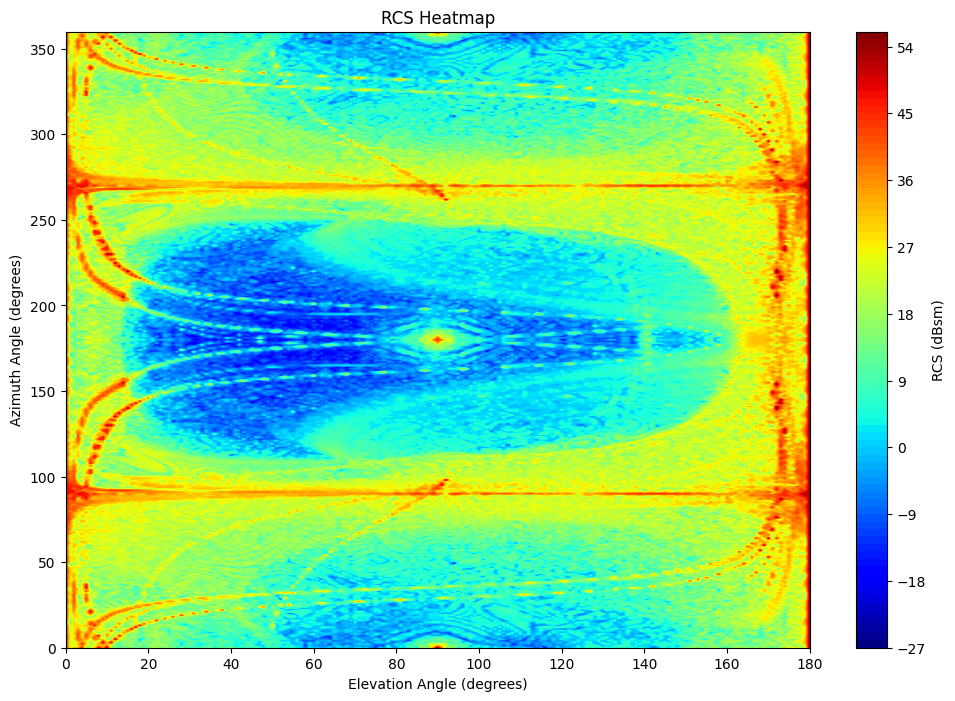

In [4]:
# 합쳐진 결과물 csv 파일을 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/737/737_PO_3D_1_9GHz_FFE.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap
pivot_table = df.pivot(index='Azimuth Angle (degrees)', columns='Elevation Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Elevation Angle (degrees)')
plt.ylabel('Azimuth Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

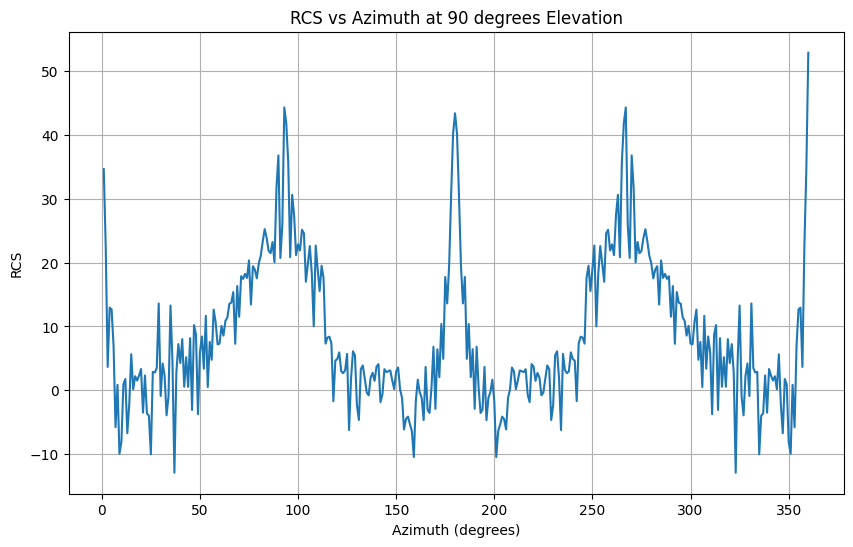

In [3]:
data_path = 'C:/Users/leeyj/lab_ws/data/radar/737/90deg.csv'
data = pd.read_csv(data_path)

azimuth = data.iloc[:, 1].to_numpy()
rcs = data.iloc[:, 2].to_numpy()

# # 극 좌표계
# azimuth_rad = np.deg2rad(azimuth)
# plt.figure(figsize=(8, 8))
# ax = plt.subplot(111, projection='polar')
# ax.plot(azimuth_rad, rcs)
# ax.set_title('RCS Polar Plot at 90 degrees Elevation')
# plt.show()

plt.figure(figsize=(10, 6))
plt.plot(azimuth, rcs)
plt.xlabel('Azimuth Angle (degrees)')
plt.ylabel('RCS Values')
plt.grid(True)
plt.show()

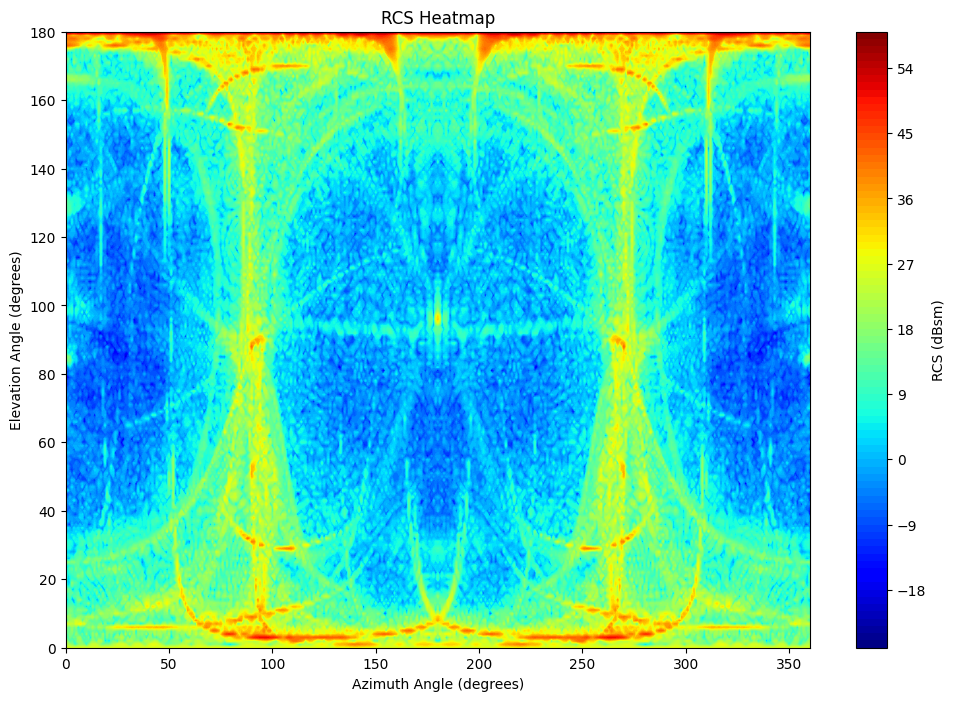

In [8]:
# 위 결과의 축을 뒤바꾸어 시각화

# Load the CSV file
file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz_FFE.csv'
df = pd.read_csv(file_path)

# Reshape the data into a 2D grid for plotting
elevation_angles = df['Elevation Angle (degrees)'].unique()
azimuth_angles = df['Azimuth Angle (degrees)'].unique()

# Create a pivot table to reshape the data for the heatmap, swapping the index and columns
pivot_table = df.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# Create the plot
plt.figure(figsize=(12, 8))
plt.contourf(pivot_table.columns, pivot_table.index, pivot_table.values, levels=100, cmap='jet')
plt.colorbar(label='RCS (dBsm)')
plt.xlabel('Azimuth Angle (degrees)')
plt.ylabel('Elevation Angle (degrees)')
plt.title('RCS Heatmap')
plt.show()

In [6]:
# 행이 고각으로, 열이 방위각으로 구성된 csv 데이터파일을 생성
# 파일 이름은 알맞게 변경
input_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/F4_PO_3D_1_9GHz_FFE.csv'
new_file_path = 'C:/Users/leeyj/lab_ws/data/radar/F4/NEW_F4_PO_3D_1_9GHz_FFE.csv'

data = pd.read_csv(input_file_path)

# 데이터를 pivot하여 새로운 형태로 재구성
pivoted_data = data.pivot(index='Elevation Angle (degrees)', columns='Azimuth Angle (degrees)', values='RCS (dBsm)')

# 재구성된 데이터를 CSV 파일로 저장
pivoted_data.to_csv(new_file_path, header=False, index=False)

pivoted_data.head()

Azimuth Angle (degrees),0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0.0,25.871115,25.868123,25.866191,25.865323,25.865521,25.866785,25.869112,25.872497,25.876933,25.882413,...,25.882413,25.876933,25.872497,25.869112,25.866785,25.865521,25.865323,25.866191,25.868123,25.871115
1.0,21.474688,21.065411,19.569847,16.544252,10.749105,8.489746,15.142921,18.113333,18.205024,15.000977,...,15.000977,18.205024,18.113333,15.142921,8.489746,10.749105,16.544252,19.569847,21.065411,21.474688
2.0,19.846836,16.353501,8.794438,13.119035,6.897761,12.957118,18.815328,19.102955,14.369302,8.928874,...,8.928874,14.369302,19.102955,18.815328,12.957118,6.897761,13.119035,8.794438,16.353501,19.846836
3.0,17.214257,6.942005,15.484598,11.327580,15.444915,13.679153,18.844838,19.320773,9.090935,13.371378,...,13.371378,9.090935,19.320773,18.844838,13.679153,15.444915,11.327580,15.484598,6.942005,17.214257
4.0,15.448833,11.090651,16.798820,16.177257,9.012298,18.435095,13.431463,8.495470,14.955990,3.914818,...,3.914818,14.955990,8.495470,13.431463,18.435095,9.012298,16.177257,16.798820,11.090651,15.448833
